__<span style="background-color:#ffffe0">第3章　時系列予測モデル構築・超入門</span>__

# 3.5　多変量時系列データの特徴把握と因果探索

## 3.5.5　非ガウスSVAR（VAR-LiNGAM）モデルで実施

### 準備（必要なモジュールとデータの読み込み）

In [1]:
#
# 必要なモジュールの読み込み
#

import pandas as pd
import numpy as np

import lingam
from lingam.utils import make_dot

from graphviz import Digraph

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定
plt.rcParams['font.size'] = 14 #フォントサイズ

In [2]:
#
# 必要なデータセット（時系列データ）の読み込み
#

dataset='MMM.csv' #データセットのファイル名
df = pd.read_csv(
    dataset,
    parse_dates=True,
    index_col='day')

print(df) #確認

                  Sales     OfflineAD    OnlineAD
day                                              
2019-01-01  2421099.200  8.255520e+05  289099.200
2019-01-02  2893768.826  8.065540e+05  297668.826
2019-01-03  2667494.968  6.178813e+05  208972.890
2019-01-04  2016377.026  1.003793e+06  166375.482
2019-01-05  2511385.175  6.651360e+05  230455.368
...                 ...           ...         ...
2019-06-26  2373450.715  1.120225e+06  138594.564
2019-06-27  1860416.854  1.148680e+06  174731.142
2019-06-28  2546100.284  9.110840e+05  138329.496
2019-06-29  2961440.424  9.963220e+05  265571.064
2019-06-30  3322232.779  6.408697e+05  313092.000

[181 rows x 3 columns]


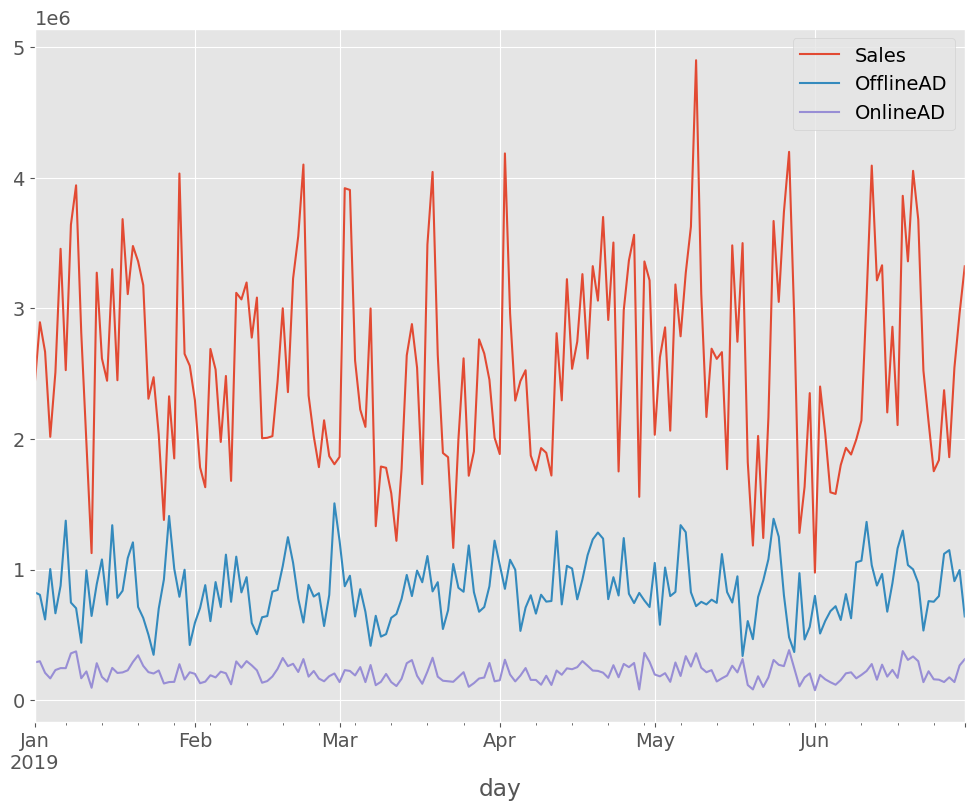

In [3]:
#
# 時系列データのグラフ化（折れ線グラフ）
#

df.plot()
plt.show()

### VAR-LiNGAMで変数間の関係性を検討

#### VAR-LiNGAMの構築

In [4]:
#
# VAR-LiNGAMの構築
#

# モデルのインスタンス生成
model = lingam.VARLiNGAM(lags=2, prune=True)

# 学習
model.fit(df)

# 推定結果（有向グラフの隣接行列）
print(model.adjacency_matrices_)

[[[ 0.          0.          6.5526491 ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.31045663  0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.          1.45410481  0.        ]
  [-0.05044763  0.          0.        ]
  [ 0.          0.13448761  0.        ]]]


#### 有向グラフ（VAR-LiNGAM）

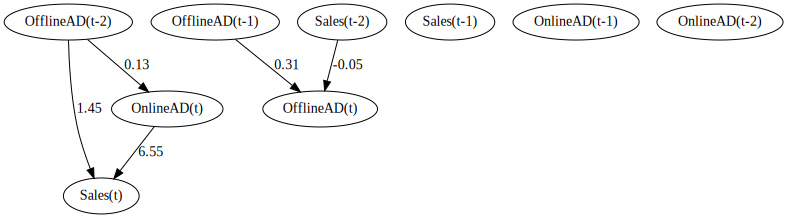

In [5]:
#
# 有向グラフ（VAR-LiNGAM）
#

labels = ['Sales(t)', 'OfflineAD(t)', 'OnlineAD(t)', 
          'Sales(t-1)', 'OfflineAD(t-1)', 'OnlineAD(t-1)', 
          'Sales(t-2)', 'OfflineAD(t-2)', 'OnlineAD(t-2)']

make_dot(np.hstack(model.adjacency_matrices_),
         lower_limit=0.05,
         ignore_shape=True,
         labels=labels)